In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
pd.set_option("display.max_rows", 10)
import seaborn as sns
%matplotlib inline  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

import imblearn

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [2]:
url="http://kdd.ics.uci.edu/databases/tic/ticdata2000.txt"
train_data=pd.read_table(url,names=['Customer Subtype', 'Number of houses', 'Avg size household', 'Avg age', 'Customer main type', 'Roman catholic',
       'Protestant', 'Other religion', 'No religion', 'Married', 'Living together', 'Other relation', 'Singles',
       'Household without children', 'Household with children', 'High level education', 'Medium level education', 'Lower level education', 'High status',
       'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers', 'Unskilled labourers', 'Social class A',
       'Social class B1', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', 'Home owners', '1 car', '2 cars',
       'No car', 'National Health Service', 'Private health insurance', 'Income < 30.000', 'Income 30-45.000', 'ncome 45-75.000',
       'Income 75-122.000', 'Income >123.000', 'Average income', 'Purchasing power class', 'Contribution private third party insurance', 'Contribution third party insurance',
       ' Contribution third party insurane', 'Contribution car policies', 'Contribution delivery van policies', 'Contribution motorcycle/scooter policies', 'Contribution lorry policies', 'Contribution trailer policies',
       'Contribution tractor policies', 'Contribution agricultural machines policies', 'Contribution moped policies', 'Contribution life insurances', 'Contribution private accident insurance policies', 'Contribution family accidents insurance policies',
       'Contribution disability insurance policies', 'Contribution fire policies', 'Contribution surfboard policies', 'Contribution boat policies', 'Contribution bicycle policies', 'Contribution property insurance policies',
       'Contribution social security insurance policies', 'Number of private third party insurance', ' Number of third party insurance (firms)', 'Number of third party insurane (agriculture)', 'Number of car policies', 'Number of delivery van policies',
       'Number of motorcycle/scooter policies', 'Number of lorry policies', 'Number of trailer policies', 'number of tractor policies', 'Number of agricultural machines policies', 'Number of moped policies',
       'Number of life insurances', 'number of private accident insurance policies', ' Number of family accidents insurance policies', ' Number of disability insurance policies', 'Number of fire policies', 'Number of surfboard policies',
       'Number of boat policies', 'Number of bicycle policies', 'Number of property insurance policies', 'Number of social security insurance policies', 'CARAVAN'])

In [3]:
url="http://kdd.ics.uci.edu/databases/tic/ticeval2000.txt"
test_data=pd.read_table(url,names=['Customer Subtype', 'Number of houses', 'Avg size household', 'Avg age', 'Customer main type', 'Roman catholic',
       'Protestant', 'Other religion', 'No religion', 'Married', 'Living together', 'Other relation', 'Singles',
       'Household without children', 'Household with children', 'High level education', 'Medium level education', 'Lower level education', 'High status',
       'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers', 'Unskilled labourers', 'Social class A',
       'Social class B1', 'Social class B2', 'Social class C', 'Social class D', 'Rented house', 'Home owners', '1 car', '2 cars',
       'No car', 'National Health Service', 'Private health insurance', 'Income < 30.000', 'Income 30-45.000', 'ncome 45-75.000',
       'Income 75-122.000', 'Income >123.000', 'Average income', 'Purchasing power class', 'Contribution private third party insurance', 'Contribution third party insurance',
       ' Contribution third party insurane', 'Contribution car policies', 'Contribution delivery van policies', 'Contribution motorcycle/scooter policies', 'Contribution lorry policies', 'Contribution trailer policies',
       'Contribution tractor policies', 'Contribution agricultural machines policies', 'Contribution moped policies', 'Contribution life insurances', 'Contribution private accident insurance policies', 'Contribution family accidents insurance policies',
       'Contribution disability insurance policies', 'Contribution fire policies', 'Contribution surfboard policies', 'Contribution boat policies', 'Contribution bicycle policies', 'Contribution property insurance policies',
       'Contribution social security insurance policies', 'Number of private third party insurance', ' Number of third party insurance (firms)', 'Number of third party insurane (agriculture)', 'Number of car policies', 'Number of delivery van policies',
       'Number of motorcycle/scooter policies', 'Number of lorry policies', 'Number of trailer policies', 'number of tractor policies', 'Number of agricultural machines policies', 'Number of moped policies',
       'Number of life insurances', 'number of private accident insurance policies', ' Number of family accidents insurance policies', ' Number of disability insurance policies', 'Number of fire policies', 'Number of surfboard policies',
       'Number of boat policies', 'Number of bicycle policies', 'Number of property insurance policies', 'Number of social security insurance policies'])

In [4]:
url="http://kdd.ics.uci.edu/databases/tic/tictgts2000.txt"
test_target = pd.read_table(url,names=['CARAVAN'])

In [5]:
test_data.loc[:,'CARAVAN'] = test_target

In [6]:
X_train = train_data
y_train = train_data.CARAVAN
X_test = test_data
y_test = test_data.CARAVAN

In [7]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report

def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
  
    cm = confusion_matrix(y_true, y_pred)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)


    # Add Precision, Recall, F-1 Score as Captions Below Plot
    rpt = classification_report(y_true, y_pred)
    rpt = rpt.replace('avg / total', '      avg')
    rpt = rpt.replace('support', 'N Obs')

    plt.annotate(rpt, 
                 xy = (0,0), 
                 xytext = (-50, -140), 
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=12, ha='left')    

    # Plot
    plt.tight_layout()


## Random Under-sampling

In [11]:
rus = RandomUnderSampler(return_indices=True , random_state  = 10)
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)
print('Removed indexes:', id_rus)

Removed indexes: [4284  820 4115 3423  440 2598 2814 1679  614 5211 1920 3810 2774 1080
 4562  140 1867 2206 2209 3992 4342 4572 5197 1135 4133 5521  906  428
 4979 1407 1955 4261 2818  108  975   77 3198 5276 4530 4011 5636 2149
 5697  567 2451 1175 2232  430 2036 2778 3542 5388  238  286 5331 3523
 3473  146 5336 4642 5007  424 1832 3004 2773 5659 2349 2484 3600 2121
  495 4993 1514 2385 2000  941 2978 4601 3996 4266 5550 4769 4880 5207
  830 4044 5253 2258 2508 4411  790   46 1238 3639 1316 1189 5034    8
 5640  290 1614 4324  556 2979  543 1824 3870 5019 3985 1212 1004 5469
 5251 2088 4733 3397 4583  178 3769 4748 4231 1378 3451 3385 1916 1223
  703 1276 1128  751 4451 2434 4939 5444 4991  452 5406 2308 5678 4094
 1576 2711  229 2006 2972 2539  853 1279 2457 3842 5703 4600 2891 4701
 1472  779 4777 3850 5309 2679 4371 3240 2760 5524   27 5810    5   16
 3474 5326 1217 5012 4967 2574 3827 2395 3349 5301 3550 2398 5615 4462
 3757 3295  437 1292 1752 4132 1921 3934 2776 4003 2422  137

Accuracy on training set: 0.770
Accuracy on test set: 0.600
Cross Validation: 0.631
[[2234 1528]
 [  72  166]]


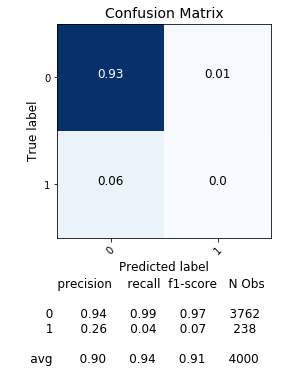

In [52]:

y_test , predictions
def withRandomSampling(classifier,X_rus,y_rus):

    classifier.fit(X_rus, y_rus)
    
    #knn.fit(train_data, train_data.CARAVAN)
    
    predictions=classifier.predict(X_test)
    print("Accuracy on training set: {:.3f}".format(classifier.score(X_rus, y_rus)))
    print("Accuracy on test set: {:.3f}".format(classifier.score(X_test, y_test)))
    print ("Cross Validation: {:.3f}".format( cross_val_score(knn, X_rus, y_rus, cv=10, scoring='accuracy').mean() ))
    print(metrics.confusion_matrix(y_test, predictions))



withRandomSampling(KNeighborsClassifier(n_neighbors=5),X_rus,y_rus)


pretty_print_conf_matrix(y_test, predictions, 
                             classes= ['0', '1'],
                             normalize=True, 
                             title='Confusion Matrix')






## TomekLinks

In [31]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X_train, y_train)

print('Removed indexes:', id_tl)


Removed indexes: [   0    1    2 ... 5819 5820 5821]


Accuracy on training set: 0.943
Accuracy on test set: 0.936
Cross Validation: 0.935
[[3737   25]
 [ 229    9]]


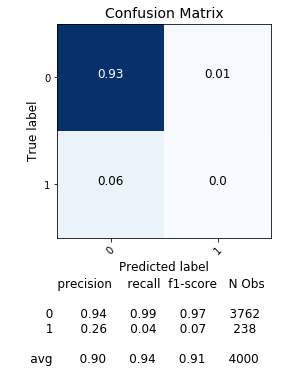

In [39]:
knn  = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tl, y_tl)
#knn.fit(train_data, train_data.CARAVAN)
predictions=knn.predict(X_test)
print("Accuracy on training set: {:.3f}".format(knn.score(X_tl, y_tl)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))
print ("Cross Validation: {:.3f}".format( cross_val_score(knn, X_tl, y_tl, cv=10, scoring='accuracy').mean() ))
print(metrics.confusion_matrix(y_test, predictions))
pretty_print_conf_matrix(y_test, predictions, 
                         classes= ['0', '1'],
                         normalize=True, 
                         title='Confusion Matrix')


## Under-sampling: Cluster Centroids

Accuracy on training set: 1.000
Accuracy on test set: 0.363
Cross Validation: 0.777
[[1246 2516]
 [  31  207]]


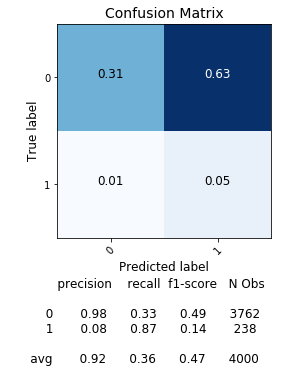

In [36]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X_train, y_train)

knn  = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_cc, y_cc)
#knn.fit(train_data, train_data.CARAVAN)
predictions=knn.predict(X_test)
print("Accuracy on training set: {:.3f}".format(knn.score(X_cc, y_cc)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))
print ("Cross Validation: {:.3f}".format( cross_val_score(knn, X_cc, y_cc, cv=10, scoring='accuracy').mean() ))
print(metrics.confusion_matrix(y_test, predictions))
pretty_print_conf_matrix(y_test, predictions, 
                         classes= ['0', '1'],
                         normalize=True, 
                         title='Confusion Matrix')


## Synthetic Minority Over-sampling Technique

In [55]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

C:\Users\Naveed Anwar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


## With SMOTE 

Accuracy on training set: 0.943
Accuracy on test set: 0.939
[[3749   13]
 [ 232    6]]
Cross Validation: 0.935
Precision  0.3157894736842105


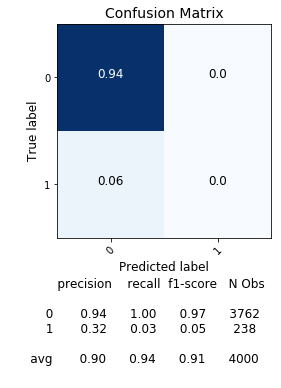

In [56]:

knn  = KNeighborsClassifier(n_neighbors=5)
#knn.fit(x_train_res, y_train_res)
knn.fit(train_data, train_data.CARAVAN)
predictions=knn.predict(X_test)
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))
print(metrics.confusion_matrix(y_test, predictions))
print ("Cross Validation: {:.3f}".format( cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy').mean() ))

pretty_print_conf_matrix(y_test, predictions, 
                         classes= ['0', '1'],
                         normalize=True, 
                         title='Confusion Matrix')

print("Precision " , metrics.precision_score(y_test, predictions))

## With SMOTE 




 KNN
Accuracy on training set: 0.938
Accuracy on test set: 0.785
Cross Validation: 0.897
[[3039  723]
 [ 135  103]]



 Logistic Regression
Accuracy on training set: 1.000
Accuracy on test set: 1.000
Cross Validation: 0.897
[[3762    0]
 [   0  238]]



 decision tree
Accuracy on training set: 1.000
Accuracy on test set: 1.000
Cross Validation: 0.897
[[3762    0]
 [   0  238]]



 random forest
Accuracy on training set: 1.000
Accuracy on test set: 1.000
Cross Validation: 0.897
[[3762    0]
 [   0  238]]


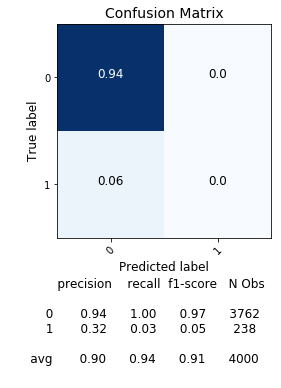

In [57]:

y_test , predictions
def withSampling(classifier,x_train_res,y_train_res):

    classifier.fit(x_train_res, y_train_res)
    #knn.fit(train_data, train_data.CARAVAN)
    predictions=classifier.predict(X_test)
    print("Accuracy on training set: {:.3f}".format(classifier.score(x_train_res, y_train_res)))
    print("Accuracy on test set: {:.3f}".format(classifier.score(X_test, y_test)))
    print ("Cross Validation: {:.3f}".format( cross_val_score(knn, x_train_res, y_train_res, cv=10, scoring='accuracy').mean() ))
    print(metrics.confusion_matrix(y_test, predictions))



print ("\n")
print ("\n KNN")
withSampling(KNeighborsClassifier(n_neighbors=5),x_train_res,y_train_res)

print ("\n")
print ("\n Logistic Regression")
withSampling(LogisticRegression(),x_train_res,y_train_res)

print ("\n")
print ("\n decision tree")
withSampling(DecisionTreeClassifier(max_depth=10, random_state=0),x_train_res,y_train_res)

print ("\n")
print ("\n random forest")
withSampling(RandomForestClassifier(n_estimators=100, random_state=0),x_train_res,y_train_res)

pretty_print_conf_matrix(y_test, predictions, 
                             classes= ['0', '1'],
                             normalize=True, 
                             title='Confusion Matrix')


Accuracy on training set: 1.000
Accuracy on test set: 1.000
Cross Validation: 0.897
[[3762    0]
 [   0  238]]


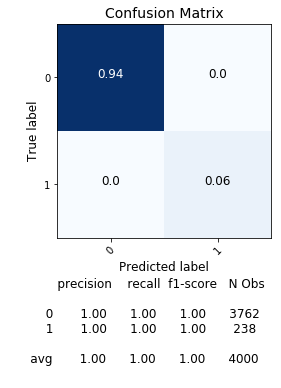

In [58]:
def randomforest(classifier,x_train_res,y_train_res):

    classifier.fit(x_train_res, y_train_res)
    #knn.fit(train_data, train_data.CARAVAN)
    predictions=classifier.predict(X_test)
    print("Accuracy on training set: {:.3f}".format(classifier.score(x_train_res, y_train_res)))
    print("Accuracy on test set: {:.3f}".format(classifier.score(X_test, y_test)))
    print ("Cross Validation: {:.3f}".format( cross_val_score(knn, x_train_res, y_train_res, cv=10, scoring='accuracy').mean() ))
    print(metrics.confusion_matrix(y_test, predictions))
    
    pretty_print_conf_matrix(y_test, predictions, 
                                 classes= ['0', '1'],
                                 normalize=True, 
                                 title='Confusion Matrix')    

randomforest(RandomForestClassifier(n_estimators=100, random_state=0),x_train_res,y_train_res)